# Convolutional Networks

**Используя сверточные слои и архитектуру получите на fashion mnist качество не ниже 89,5%**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch

In [3]:
import torchvision as tv

In [4]:
BATCH_SIZE=256

In [5]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
# device

## Данные

In [7]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)

# # Move all data to cuda.
# train_dataset.data.to(device)
# train_dataset.targets.to(device)
# test_dataset.data.to(device)
# test_dataset.targets.to(device)

# Create data loader.
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [8]:
import numpy as np

In [9]:
train.dataset.targets.shape

torch.Size([60000])

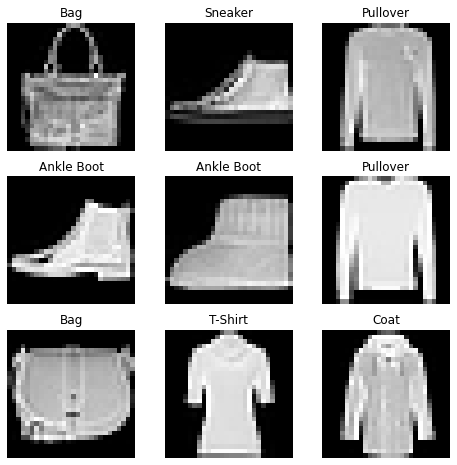

In [19]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Модель

In [26]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.classifier = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), padding=(1,1), stride=(1,1)),
            torch.nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), padding=(1,1), stride=(1,1)),
            torch.nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            torch.nn.Flatten(),
            torch.nn.Linear(16*7*7, 256),
            torch.nn.BatchNorm1d(256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 10)
        )
        
    def forward(self, x):
        # x = x.view(x.size(0), -1)
        return self.classifier(x)

# model
model = CNN()

# move to device.
# model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001)

In [27]:
model

CNN(
  (classifier): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=784, out_features=256, bias=True)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [28]:
num_epochs = 20
for epoch in range(num_epochs):
    train_iters, train_passed = 0, 0
    train_loss, train_acc = 0, 0
    for batch_idx, (data, target) in enumerate(train):
        optimizer.zero_grad()
        y_pred = model(data)
        l = loss(y_pred, target)
        l.backward()
        optimizer.step()
        train_loss += l.item()
        train_acc +=(y_pred.argmax(dim=1) == target).sum().item()
        train_iters += 1
        train_passed += len(data)
        
    test_iters, test_passed = 0, 0
    test_loss, test_acc = 0, 0
    for batch_idx, (data, target) in enumerate(test):
        y_pred = model(data)
        l = loss(y_pred, target)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == target).sum().item()
        test_iters += 1
        test_passed += len(data)
        
    # print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, l.item()))
    print("epoch: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(epoch, train_loss / train_iters, train_acc / train_passed, test_loss / test_iters, test_acc / test_passed))

epoch: 0, train_loss: 0.5630905637081633, train_acc: 0.8288833333333333, test_loss: 0.43746593594551086, test_acc: 0.8546
epoch: 1, train_loss: 0.37894119379368235, train_acc: 0.8739166666666667, test_loss: 0.37423202097415925, test_acc: 0.87
epoch: 2, train_loss: 0.32960247720809693, train_acc: 0.886, test_loss: 0.3446107964962721, test_acc: 0.8784
epoch: 3, train_loss: 0.30006245577588997, train_acc: 0.8951, test_loss: 0.3261635549366474, test_acc: 0.8833
epoch: 4, train_loss: 0.278677085105409, train_acc: 0.9020333333333334, test_loss: 0.313203002512455, test_acc: 0.8879
epoch: 5, train_loss: 0.2615864205233594, train_acc: 0.9084666666666666, test_loss: 0.30379905439913274, test_acc: 0.89
epoch: 6, train_loss: 0.2472301923214121, train_acc: 0.9133833333333333, test_loss: 0.2958106707781553, test_acc: 0.8924
epoch: 7, train_loss: 0.23472537632952345, train_acc: 0.9177333333333333, test_loss: 0.28954348899424076, test_acc: 0.8945
epoch: 8, train_loss: 0.2236017241122875, train_acc: 0.